# Taller 1

## Integrantes:

* Juan Sebastián Libreros García
* Pablo Guzmán

# Contexto

Usted hace parte del equipo de analítica de datos del Sunderland AFC de la segunda división inglesa. Se les ha encomendado trabajar en un proyecto sobre reclutar jugadores (scouting). Para ello, cuenta con una base de datos del videojuego FIFA que cuenta con información real de 22,080 jugadores a nivel mundial, recolectada en febrero de 2023. Esta información es confiable dado que dicha empresa cuenta con más de 6 mil scouts alrededor del mundo quienes realizan permanentes evaluaciones sobre el desempeño de los jugadores.

# Problema 

Su jefe le ha pedido una descripción de la base de datos, para conocer mejor cómo pueden trabajar con ella. La base de datos cuenta con una pestaña donde está el diccionario de variables. Tenga en cuenta esta información para poder entender los datos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

# Desarrollo

In [2]:
players = pd.read_csv('base_taller.csv', sep=';')

In [3]:
players.head()

,player_id,player_name,age,country,height_cm,weight_lbs,position,overall,potential,Value_millions,pref_foot,weak_foot,skill_moves,international_reputation,Attacking_work_rate,Defensive_work_rate,body_type,club_country,club_name,club_overall
0,231747,Kylian Mbappé Lottin,23,France,182,161,ST,91,95,"190,5",Right,4,5,4,High,Low,Unique,France,Paris Saint Germain,84
1,192985,Kevin De Bruyne,31,Belgium,181,165,CM,91,91,"107,5",Right,5,4,4,High,Medium,Unique,England,Manchester City,85
2,188545,Robert Lewandowski,33,Poland,185,179,ST,91,91,84,Right,4,4,5,High,Medium,Unique,Spain,Fc Barcelona,83
3,165153,Karim Benzema,34,France,185,179,CF,91,91,64,Right,4,4,4,Medium,Medium,Normal (170-185),Spain,Real Madrid,85
4,158023,Lionel Andrés Messi Cuccittini,35,Argentina,169,148,RW,91,91,54,Left,4,4,5,Low,Low,Unique,France,Paris Saint Germain,84


In [4]:
players.isna().sum()

player_id                   0
player_name                 0
age                         0
country                     0
height_cm                   0
weight_lbs                  0
position                    0
overall                     0
potential                   0
Value_millions              0
pref_foot                   0
weak_foot                   0
skill_moves                 0
international_reputation    0
Attacking_work_rate         0
Defensive_work_rate         0
body_type                   0
club_country                0
club_name                   0
club_overall                0
dtype: int64

#### 1. ¿Qué tipo de variable es cada una de las columnas? (recuerde responder según las 4 clasificaciones vistas en clase).

In [5]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22080 entries, 0 to 22079
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   player_id                 22080 non-null  int64 
 1   player_name               22080 non-null  object
 2   age                       22080 non-null  int64 
 3   country                   22080 non-null  object
 4   height_cm                 22080 non-null  int64 
 5   weight_lbs                22080 non-null  int64 
 6   position                  22080 non-null  object
 7   overall                   22080 non-null  int64 
 8   potential                 22080 non-null  int64 
 9   Value_millions            22080 non-null  object
 10  pref_foot                 22080 non-null  object
 11  weak_foot                 22080 non-null  int64 
 12  skill_moves               22080 non-null  int64 
 13  international_reputation  22080 non-null  int64 
 14  Attacking_work_rate   

| Atributo                    | Tipo de variable                | Justificación                                                                 |
|----------------------------|----------------------------------|-------------------------------------------------------------------------------|
| player_id                  | Numérica discreta                | Identificador único, valores enteros sin decimales                            |
| player_name                | Categórica nominal               | Nombres de jugadores, no existe orden                                         |
| age                        | Numérica discreta                | Edad en años, valores enteros                                                 |
| country                    | Categórica nominal               | País de origen, no existe orden                                               |
| height_cm                  | Numérica continua                | Estatura en cm, puede tomar cualquier valor dentro de un rango                |
| weight_lbs                 | Numérica continua                | Peso en libras, puede tomar cualquier valor dentro de un rango                |
| position                   | Categórica nominal               | Posición en el campo, no existe orden                                         |
| overall                    | Numérica discreta                | Puntaje entero de desempeño                                                   |
| potential                  | Numérica discreta                | Puntaje entero de potencial                                                   |
| Value_millions             | Numérica continua                | Valor en millones, puede tomar decimales                                      |
| pref_foot                  | Categórica nominal               | Pie preferido, no existe orden                                                |
| weak_foot                  | Numérica discreta                | Puntaje entero de habilidad con pie débil                                     |
| skill_moves                | Numérica discreta                | Puntaje entero de habilidad técnica                                           |
| international_reputation   | Numérica discreta                | Puntaje entero de reputación internacional                                    |
| Attacking_work_rate        | Categórica ordinal               | Nivel de esfuerzo ofensivo (Low, Medium, High), existe orden                  |
| Defensive_work_rate        | Categórica ordinal               | Nivel de esfuerzo defensivo (Low, Medium, High), existe orden                 |
| body_type                  | Categórica nominal               | Tipo de cuerpo, no existe orden                                               |
| club_country               | Categórica nominal               | País del club, no existe orden                                                |
| club_name                  | Categórica nominal               | Nombre del club, no existe orden                                              |
| club_overall               | Numérica discreta                | Puntaje entero de desempeño del club                                          |

---------------------------------------------------------------------------------------------------------------------------------------

#### 2. Realice un completo análisis descriptivo de las columnas que vamos a utilizar:

a) Age
b) height_cm
c) position
d) club_country
e) overall
f) club_overall
g) value_millions
h) pref_foot

-----------------------------------------------------------------------------------

#### 3. Un miembro del cuerpo técnico asegura que los arqueros (GK) altos tienen un mejor desempeño (overall). ¿Qué puede afirmar usted a través de un análisis descriptivo? (Nota: tome por definición tres grupos de estatura: i) menor a 185 cm; ii) entre 185 y 192 cm; iii) más de 192 cm)

In [6]:
goalKeepers = players[players['position'] == 'GK']
goalKeepers = goalKeepers[['position', 'overall', 'height_cm',]]

In [7]:
goalKeepers_under_185 = goalKeepers[goalKeepers['height_cm'] < 185]
goalKeepers_between_185_and_192 = goalKeepers[(goalKeepers['height_cm'] >= 185) & (goalKeepers['height_cm'] <= 192)]
goalKeepers_over_192 = goalKeepers[goalKeepers['height_cm'] > 192]

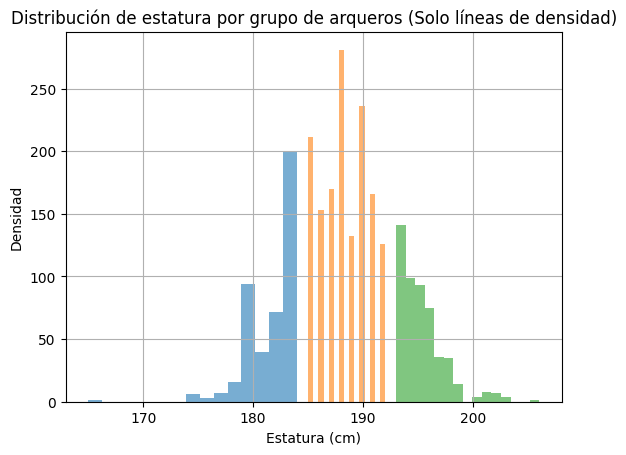

In [8]:
plt.hist(goalKeepers_under_185['height_cm'], bins=15, alpha=0.6,  label='Menor a 185 cm')
plt.hist(goalKeepers_between_185_and_192['height_cm'], bins=15, alpha=0.6, label='185-192 cm')
plt.hist(goalKeepers_over_192['height_cm'], bins=15, alpha=0.6, label='Más de 192 cm')
plt.xlabel('Estatura (cm)')
plt.ylabel('Densidad')
plt.title('Distribución de estatura por grupo de arqueros (Solo líneas de densidad)')
plt.grid()
plt.show()


In [9]:
print("Arqueros con estatura menor a 185 cm:")
print(goalKeepers_under_185['overall'].describe())

print("\nArqueros con estatura entre 185 y 192 cm:")
print(goalKeepers_between_185_and_192['overall'].describe())

print("\nArqueros con estatura mayor a 192 cm:")
print(goalKeepers_over_192['overall'].describe())

Arqueros con estatura menor a 185 cm:
count    438.000000
mean      62.086758
std        7.177180
min       48.000000
25%       57.000000
50%       62.000000
75%       67.000000
max       86.000000
Name: overall, dtype: float64

Arqueros con estatura entre 185 y 192 cm:
count    1475.000000
mean       64.141017
std         7.379823
min        46.000000
25%        59.000000
50%        64.000000
75%        69.000000
max        89.000000
Name: overall, dtype: float64

Arqueros con estatura mayor a 192 cm:
count    517.000000
mean      64.746615
std        7.639378
min       48.000000
25%       60.000000
50%       64.000000
75%       70.000000
max       90.000000
Name: overall, dtype: float64


--------------------------------------------------------------------------------------

#### 4. Un analista afirma que los jugadores zurdos, tienen un mejor desempeño (overall) que los diestros. ¿Qué puede decir sobre esta afirmación a través de un análisis descriptivo?

---------------------------------------------------------------------------------------------------

#### 5. Un scout asegura que los mejores jugadores, según el puntaje de desempeño (overall), juegan en clubes que pertenecen al grupo de “ligas top5” (Inglaterra, España, Alemania, Italia y Francia). ¿Qué puede decir sobre estas dos afirmaciones a través de un análisis descriptivo?

In [10]:
# Definir los países de las ligas top5
top5_countries = ['England', 'Spain', 'Germany', 'Italy', 'France']

# Filtrar jugadores de ligas top5 y otras ligas
players_top5 = players[players['club_country'].isin(top5_countries)]
players_other = players[~players['club_country'].isin(top5_countries)]

print("=== ANÁLISIS DESCRIPTIVO: LIGAS TOP5 VS OTRAS LIGAS ===\n")

# Estadísticas básicas del overall para ambos grupos
print("1. ESTADÍSTICAS DESCRIPTIVAS DEL OVERALL:")
print("\nJugadores en ligas TOP5:")
print(players_top5['overall'].describe())

print("\nJugadores en otras ligas:")
print(players_other['overall'].describe())

# Comparación de medias
mean_top5 = players_top5['overall'].mean()
mean_other = players_other['overall'].mean()
print(f"\n2. COMPARACIÓN DE MEDIAS:")
print(f"Media overall ligas TOP5: {mean_top5:.2f}")
print(f"Media overall otras ligas: {mean_other:.2f}")
print(f"Diferencia: {mean_top5 - mean_other:.2f} puntos")

# Distribución de jugadores por rango de overall
print(f"\n3. DISTRIBUCIÓN POR RANGOS DE OVERALL:")

# Definir rangos de calidad
bins = [0, 60, 70, 80, 90, 100]
labels = ['Bajo (0-60)', 'Medio (60-70)', 'Bueno (70-80)', 'Muy Bueno (80-90)', 'Élite (90-100)']

players_top5_ranges = pd.cut(players_top5['overall'], bins=bins, labels=labels, right=False)
players_other_ranges = pd.cut(players_other['overall'], bins=bins, labels=labels, right=False)

# Contar y calcular porcentajes
top5_counts = players_top5_ranges.value_counts().sort_index()
other_counts = players_other_ranges.value_counts().sort_index()

top5_percentages = (top5_counts / len(players_top5) * 100)
other_percentages = (other_counts / len(players_other) * 100)

print("\nLigas TOP5:")
for i, label in enumerate(labels):
    print(f"{label}: {top5_counts.iloc[i]} jugadores ({top5_percentages.iloc[i]:.1f}%)")

print("\nOtras ligas:")
for i, label in enumerate(labels):
    print(f"{label}: {other_counts.iloc[i]} jugadores ({other_percentages.iloc[i]:.1f}%)")

# Análisis de los mejores jugadores (overall >= 85)
best_players_top5 = players_top5[players_top5['overall'] >= 85]
best_players_other = players_other[players_other['overall'] >= 85]

total_best = len(players[players['overall'] >= 85])
pct_best_top5 = len(best_players_top5) / total_best * 100
pct_best_other = len(best_players_other) / total_best * 100

print(f"\n4. ANÁLISIS DE LOS MEJORES JUGADORES (Overall ≥ 85):")
print(f"Total de jugadores élite: {total_best}")
print(f"En ligas TOP5: {len(best_players_top5)} ({pct_best_top5:.1f}%)")
print(f"En otras ligas: {len(best_players_other)} ({pct_best_other:.1f}%)")

# Porcentaje de jugadores por liga
total_players = len(players)
pct_players_top5 = len(players_top5) / total_players * 100
pct_players_other = len(players_other) / total_players * 100

print(f"\n5. DISTRIBUCIÓN GENERAL DE JUGADORES:")
print(f"Jugadores en ligas TOP5: {len(players_top5)} ({pct_players_top5:.1f}%)")
print(f"Jugadores en otras ligas: {len(players_other)} ({pct_players_other:.1f}%)")

=== ANÁLISIS DESCRIPTIVO: LIGAS TOP5 VS OTRAS LIGAS ===

1. ESTADÍSTICAS DESCRIPTIVAS DEL OVERALL:

Jugadores en ligas TOP5:
count    8141.000000
mean       66.844122
std         7.268095
min        48.000000
25%        62.000000
50%        66.000000
75%        72.000000
max        91.000000
Name: overall, dtype: float64

Jugadores en otras ligas:
count    13939.000000
mean        64.277710
std          6.329658
min         46.000000
25%         60.000000
50%         65.000000
75%         68.000000
max         87.000000
Name: overall, dtype: float64

2. COMPARACIÓN DE MEDIAS:
Media overall ligas TOP5: 66.84
Media overall otras ligas: 64.28
Diferencia: 2.57 puntos

3. DISTRIBUCIÓN POR RANGOS DE OVERALL:

Ligas TOP5:
Bajo (0-60): 1181 jugadores (14.5%)
Medio (60-70): 4184 jugadores (51.4%)
Bueno (70-80): 2352 jugadores (28.9%)
Muy Bueno (80-90): 418 jugadores (5.1%)
Élite (90-100): 6 jugadores (0.1%)

Otras ligas:
Bajo (0-60): 2931 jugadores (21.0%)
Medio (60-70): 8262 jugadores (59.3%)


----------------------------------------------------------------------------------------

#### 6. Otro scout asegura que la proporción de jugadores zurdos es mayor en la posición de centro campista (CM) que en la de centro campista ofensivo (CAM). ¿Qué puede decir sobre esta afirmación?

-------------------------------------------------------------------------------------------------------------------

#### 7. Otro scout asegura que los mejores jugadores juegan en los mejores clubes del mundo ¿Es cierta esta afirmación de que existe una correlación entre el desempeño de los jugadores (overall) y el puntaje de desempeño del club al que pertenece (club_overall)?

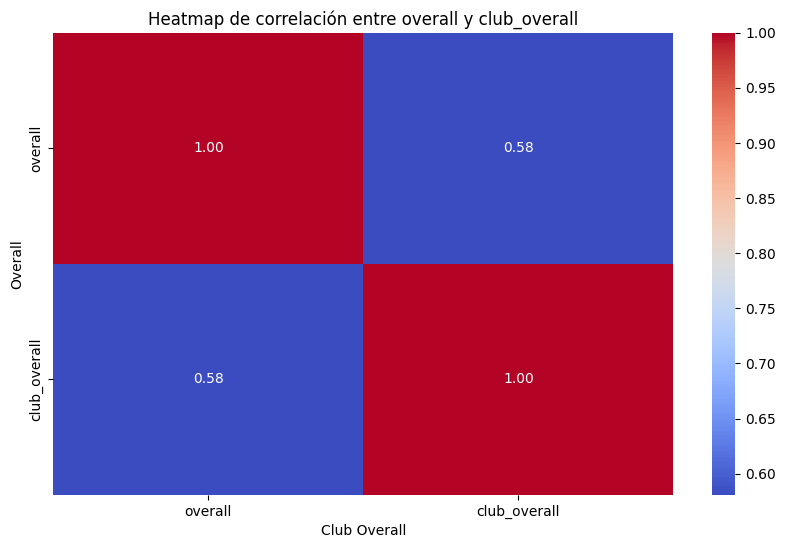

In [11]:
players_copy = players.copy()
players_copy = players_copy[['overall','club_overall']]
overall_corr = players_copy.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(overall_corr,annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de correlación entre overall y club_overall')
plt.xlabel('Club Overall')
plt.ylabel('Overall')
plt.show()

Como se puede ver lo que dice el scout no es necesariamente cierto debido a que en esta matriz de correlación se puede evidenciar que la misam no es muy alta por lo que se podía afirmar que existe una correlación positiva que, sin embargo, no es muy fuerte. Así se concluye que no necesariamente los mejores jugadores están en lso mejores clubes